# Homework 7

## Exercise 9.30
*Gradient and Newton methods*. Consider the unconstrained problem <br>
$
\begin{equation}
\text{minimize } f(x) = -\sum_{i=1}^{m} \log(1 - a_i^\top x) - \sum_{i=1}^{n} \log(1 - x_i^2)
\end{equation}
$
with variable $ x \in \mathbb{R}^n $ and $\mathbb{dom} f = \{ x \mid a_i^\top x < 1, i = 1, \ldots, m, \text{ and } |x_i| < 1, i = 1, \ldots, n \}$ <br>
This is the problem of computing the analytic center of the polyhedra in the domain.

### Part a
Use the gradient method to solve the problem, using reasonable choices for the backtracking parameters, and a stopping criterion of the form $\| \nabla f(x) \|_2 \leq \eta$. Plot the objective function and step length versus iteration number. Once you have determined $p^*$ to high accuracy, you can also plot $f-p^*$ versus iteration number. Experiment with the backtracking parameters $\alpha$ and $\beta$ to see their effect on the total number of iterations required. Carry these experiments out for several instances of the problem, of different sizes.

In [70]:
import numpy as np 
np.random.seed(42)

m = 100
n = 200

A = np.random.randn(m,n) * 100

x = np.zeros(n)

A_test = np.arange(m*n).reshape(m,n) / 10000000 #Using this to make sure a dummy vector x of ones is in the domain
x_test = np.ones(n) / 2 #Dummy vector to test the functions

def f(A, x):
    return - np.sum(np.log(1 - A @ x)) - np.sum(np.log(1-np.square(x)))

print(f"Test results: {f(A_test, x_test):.2f}")

Test results: 68.28


Calculating the gradient of the objective function:
\begin{equation}
    \nabla f(x) = -\sum_{i=1}^m \frac{1}{1-a_i^\top x} a_i - 2x \odot \frac{1}{1 - \text{diag(x)}x}
\end{equation}

In [71]:
def grad_f(A,x): #Like 80% confident on this implementation
    return A.T @ (1/(1-A@x))  + 2*x/ (1-x*x)

grad_f(A_test, x_test).shape

(200,)

Gradient descent time

In [72]:
def backtrack_search(x, delta_x, alpha, beta):
    t = 1

    while f(A, x+t*delta_x) > f(A,x) + alpha * t * grad_f(A,x).T @ delta_x or np.isnan(f(A,x)) or np.isnan(f(A, x+t*delta_x)):
        t = beta * t
    return t

def append_to_results(results,i,x,fx,grad_fx,delta_x, t):
    results["iteration"].append(i)
    results["x"].append(x)
    results["f(x)"].append(fx)
    results["grad_f(x)"].append(grad_fx)
    results["delta_x"].append(delta_x)
    results['t'].append(t)
    return results

def gradient_descent(A, x_0, alpha, beta, eta):
    results = {
        "iteration": [],
        "x": [],
        "f(x)": [],
        "grad_f(x)": [],
        "delta_x": [],
        "t": []
	}
    i=0
    x = x_0
    
    while np.linalg.norm(grad_f(A,x),2) >  eta and i <=100:
        delta_x = - grad_f(A,x)
        t = backtrack_search(x, delta_x, alpha, beta)
        
        x += t * delta_x
        i += 1
        
        results = append_to_results(results, i, x, f(A,x), grad_f(A,x), delta_x, t)
    
    return results

In [73]:
#One shot so it is re-runnable
import numpy as np 
np.random.seed(42)

m = 100
n = 200

A = np.random.randn(m,n) * 100

x = np.zeros(n)

alpha = 0.10 #Heuristic choice
beta = 0.50 #Heuristic choice
eta = 0.001 #Heuristic choice


results = gradient_descent(A, x, alpha, beta, eta)
results.keys()

/var/folders/w5/rh2cx23174z28g3pjv50mlrr0000gn/T/ipykernel_70203/491365960.py:15: RuntimeWarning: invalid value encountered in log
  return - np.sum(np.log(1 - A @ x)) - np.sum(np.log(1-np.square(x)))


dict_keys(['iteration', 'x', 'f(x)', 'grad_f(x)', 'delta_x', 't'])

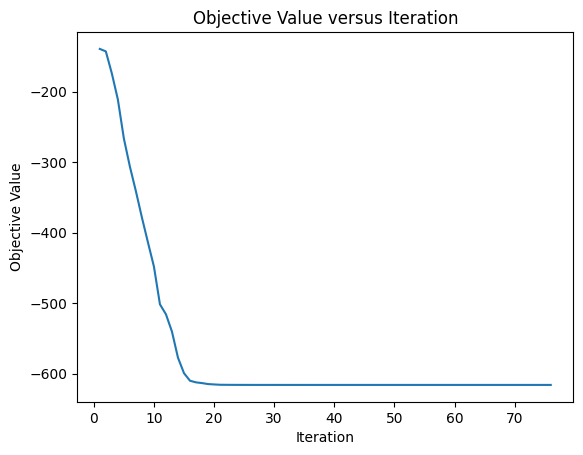

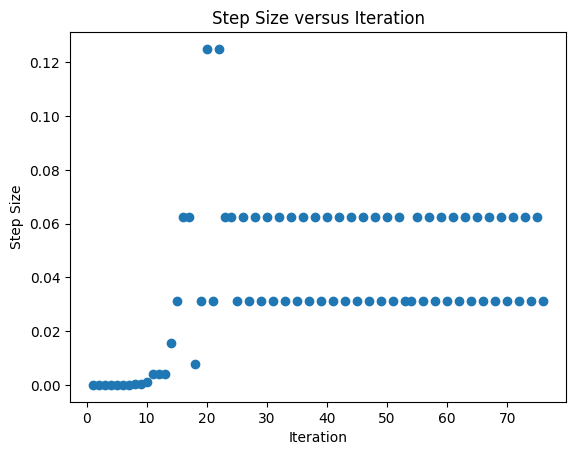

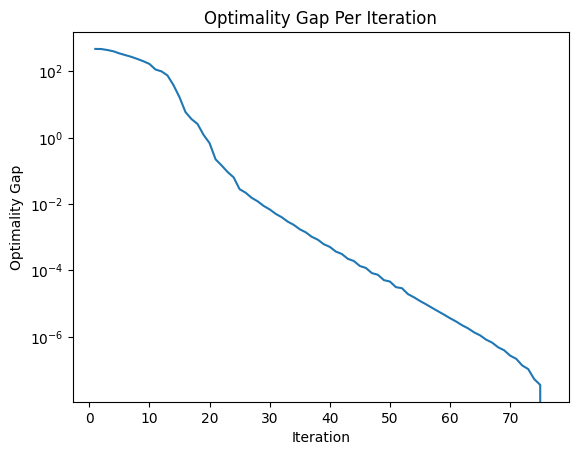

In [74]:
import matplotlib.pyplot as plt

iters = results['iteration']
f_vals = results['f(x)']
ts = results['t']

plt.plot(iters, f_vals)
plt.title("Objective Value versus Iteration")
plt.ylabel("Objective Value")
plt.xlabel("Iteration")
plt.show()

plt.scatter(iters, ts)
plt.title("Step Size versus Iteration")
plt.ylabel('Step Size')
plt.xlabel('Iteration')
plt.show()

plt.plot(iters, f_vals - min(f_vals))
plt.yscale('log')
plt.title("Optimality Gap Per Iteration")
plt.ylabel("Optimality Gap")
plt.xlabel("Iteration")
plt.show()

In [77]:
#One shot so it is re-runnable
import numpy as np 
np.random.seed(42)

m = 100
n = 200



eta = 0.1

#Experimenting with alpha and beta
alpha_beta_experiment = {
    'alphas': [],
    'betas': [],
    'n_iters': []
}
for iter_count in range(100):
    A = np.random.randn(m,n) * 100
    x = np.zeros(n)
    
    alpha = np.random.rand()/2
    beta = np.random.rand()
    
    if alpha == 0:
        alpha = 0.1
        
    if beta == 0:
        beta = 0.3

    results = gradient_descent(A,x,alpha, beta,eta)
    
    alpha_beta_experiment['alphas'].append(alpha)
    alpha_beta_experiment['betas'].append(beta)
    alpha_beta_experiment['n_iters'].append(len(results['iteration']))
    
    if iter_count % 10 == 0:
        print(f"Iteration: {iter_count}")
    



/var/folders/w5/rh2cx23174z28g3pjv50mlrr0000gn/T/ipykernel_70203/491365960.py:15: RuntimeWarning: invalid value encountered in log
  return - np.sum(np.log(1 - A @ x)) - np.sum(np.log(1-np.square(x)))


Iteration: 0
Iteration: 10
Iteration: 20
Iteration: 30
Iteration: 40
Iteration: 50
Iteration: 60
Iteration: 70
Iteration: 80
Iteration: 90


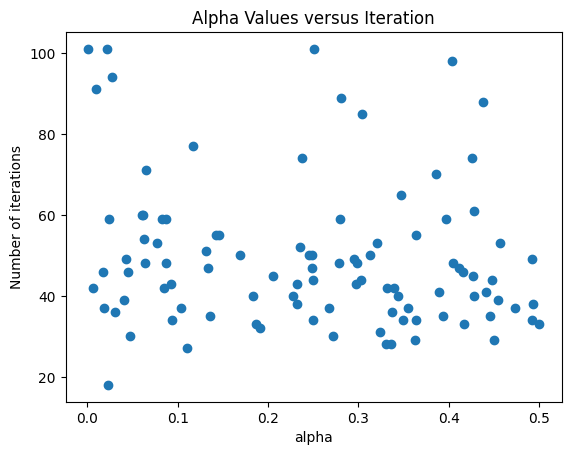

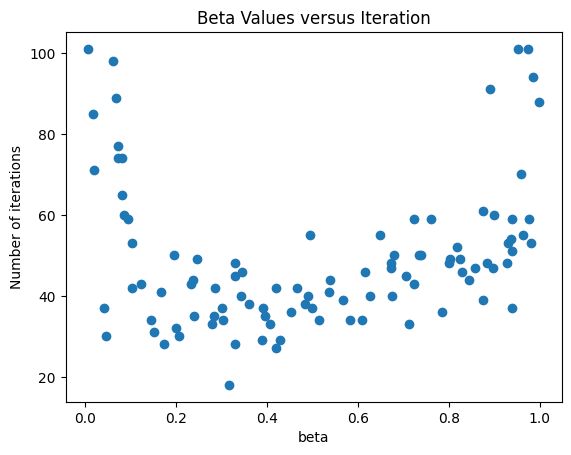

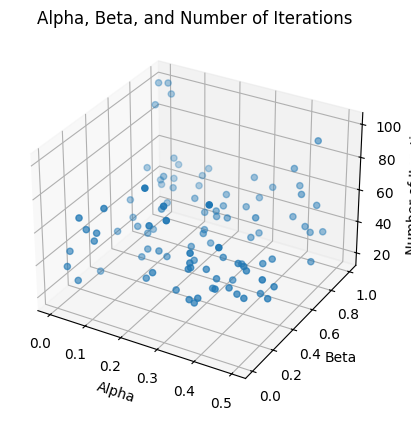

In [79]:
from mpl_toolkits.mplot3d import Axes3D

#plotting
import matplotlib.pyplot as plt

plt.scatter(alpha_beta_experiment['alphas'], alpha_beta_experiment['n_iters'])
plt.title('Alpha Values versus Iteration')
plt.xlabel('alpha')
plt.ylabel("Number of iterations")
plt.show()

plt.scatter(alpha_beta_experiment['betas'], alpha_beta_experiment['n_iters'])
plt.title('Beta Values versus Iteration')
plt.xlabel('beta')
plt.ylabel("Number of iterations")
plt.show()

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

alphas = alpha_beta_experiment['alphas']
betas = alpha_beta_experiment['betas']
n_iters = alpha_beta_experiment['n_iters']

ax.scatter(alphas, betas, n_iters)
ax.set_title('Alpha, Beta, and Number of Iterations')
ax.set_xlabel('Alpha')
ax.set_ylabel('Beta')
ax.set_zlabel('Number of Iterations')

plt.show()